# Excercises Electric Machinery Fundamentals
## Chapter 4

## Problem 4-10

In [1]:
%pylab notebook
%precision 2

Populating the interactive namespace from numpy and matplotlib


'%.2f'

### Description

Three physically identical synchronous generators are operating in parallel. They are all rated for a full load of 100 MW at $PF=0.8$ lagging. The no-load frequency of generator A is 61 Hz, and its speed droop is 3 percent. The no-load frequency of generator B is 61.5 Hz, and its speed droop is 3.4 percent. The no-load frequency of generator C is 60.5 Hz, and its speed droop is 2.6 percent.

In [2]:
Pn     = 100e6 # [W]
PF     =   0.8
f_nl_A =  61.0 # [Hz]
SD_A   =   3   # [%]
f_nl_B =  61.5 # [Hz]
SD_B   =   3.4 # [%]
f_nl_C =  60.5 # [Hz]
SD_C   =   2.6 # [%]

#### (a)
If a total load consisting of 230 MW is being supplied by this power system:

 * What will the system frequency be and how will the power be shared among the three generators?
 
#### (b)

 * Create a plot showing the power supplied by each generator as a function of the total power supplied to all loads (you may use Python to create this plot). 
 * At what load does one of the generators exceed its ratings? 
 * Which generator exceeds its ratings first?
 
#### (c)

 * Is this power sharing in (a) acceptable? Why or why not?
 
#### (d)

 * What actions could an operator take to improve the real power sharing among these generators?

### SOLUTION

#### (a)
Speed droop is defined as:

$$SD = \frac{n_\text{nl}-n_\text{fl}}{n_\text{fl}} \cdot 100\% = \frac{f_\text{nl} - f_\text{fl}}{f_\text{fl}} \cdot 100\%$$

so,

$$f_n = \frac{f_\text{nl}}{\frac{SD}{100} + 1}$$

Thus, the full-load frequencies of generators A, B and C are:

In [3]:
f_fl_A = f_nl_A / (SD_A / 100.0 +1)
f_fl_B = f_nl_B / (SD_B / 100.0 +1)
f_fl_C = f_nl_C / (SD_C / 100.0 +1)
print ('f_fl_A = {:.3f} Hz'.format(f_fl_A))
print ('f_fl_B = {:.3f} Hz'.format(f_fl_B))
print ('f_fl_C = {:.3f} Hz'.format(f_fl_C))

f_fl_A = 59.223 Hz
f_fl_B = 59.478 Hz
f_fl_C = 58.967 Hz


and the slopes of the power-frequency curves are:

$$s_P = \frac{P}{f_\text{nl} - f_\text{fl}}$$

In [4]:
sp_A = Pn / (f_nl_A - f_fl_A)
sp_B = Pn / (f_nl_B - f_fl_B)
sp_C = Pn / (f_nl_C - f_fl_C)
print('''
sp_A = {:.2f} MW/Hz
sp_B = {:.2f} MW/Hz
sp_C = {:.2f} MW/Hz
'''.format(sp_A/1e6, sp_B/1e6, sp_C/1e6))


sp_A = 56.28 MW/Hz
sp_B = 49.45 MW/Hz
sp_C = 65.23 MW/Hz



The total load is 230 MW, so the system frequency can be optained form the load power as follows:

$$P_\text{load} = s_\text{PA}(f_\text{nl,A} - f_\text{sys}) + s_\text{PB}(f_{nl,B} - f_\text{sys}) + s_\text{PC}(f_\text{nl,C} - f_\text{sys})$$ 

$$\leadsto f_\text{sys} = \frac{s_\text{PA} f_\text{nl,A} + s_\text{PB} f_{nl,B} + s_\text{PC}f_\text{nl,C} - P_\text{load}}{s_\text{PA} + s_\text{PB} + s_\text{PC}}$$ 

In [5]:
Pload = 230e6 # [W]
f_sys = (sp_A*f_nl_A + sp_B*f_nl_B + sp_C*f_nl_C - Pload) / (sp_A + sp_B + sp_C)
print('''
f_sys = {:.2f} Hz
================'''.format(f_sys))


f_sys = 59.61 Hz


The power supplied by each generator will be:

$$P = s_{P_x} \cdot (f_{\text{nl}_x} - f_{\text{sys}_x})$$

In [6]:
Pa = sp_A * (f_nl_A - f_sys)
Pb = sp_B * (f_nl_B - f_sys)
Pc = sp_C * (f_nl_C - f_sys)
print('''
Pa = {:.1f} MW
Pb = {:.1f} MW
Pc = {:.1f} MW
============'''.format(Pa/1e6, Pb/1e6, Pc/1e6))


Pa = 78.3 MW
Pb = 93.5 MW
Pc = 58.1 MW


#### (b)
Generate a vector of different load power values

In [7]:
Pload_plot = arange(0,300.1,5) * 1e6   # [W]

Calculate the system frequency as function of $P_\text{load}$ using 

$$f_\text{sys} = \frac{s_\text{PA} f_\text{nl,A} + s_\text{PB} f_{nl,B} + s_\text{PC}f_\text{nl,C} - P_\text{load}}{s_\text{PA} + s_\text{PB} + s_\text{PC}}$$ 

from part **(a)**:

In [8]:
f_sys = (sp_A*f_nl_A + sp_B*f_nl_B + sp_C*f_nl_C - Pload_plot) / (sp_A + sp_B + sp_C)

Calculate the power of each generator

In [9]:
PA = sp_A * (f_nl_A - f_sys)
PB = sp_B * (f_nl_B - f_sys)
PC = sp_C * (f_nl_C - f_sys)

Plot the power sharing versus load:

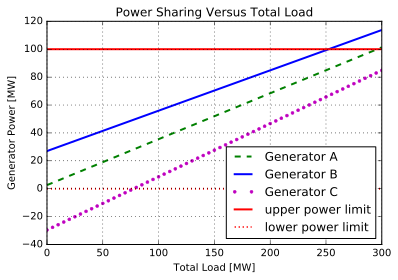

In [10]:
title('Power Sharing Versus Total Load')
xlabel('Total Load [MW]')
ylabel('Generator Power [MW]')
plot(Pload_plot/1e6, PA/1e6, 'g--', linewidth = 2)
plot(Pload_plot/1e6, PB/1e6, 'b', linewidth = 2 )
plot(Pload_plot/1e6, PC/1e6, 'm.', linewidth = 2)
plot([0, 300], [Pn/1e6, Pn/1e6], 'r', linewidth = 2)
plot([0, 300], [0, 0], 'r:', linewidth = 2)
legend(('Generator A','Generator B','Generator C','upper power limit', 'lower power limit'), loc=4, framealpha=1);
grid()

This plot reveals that there are power sharing problems both for high loads and for low loads. Generator B is the first to exceed its ratings as load increases. Its rated power is reached at a total load of 

In [11]:
interp(Pn, PB, Pload_plot)/1e6  # using the interpolate function to determine
                                # the exact crossover of PB and Pn @Pload

252.35

MW.

On the other hand, Generator C gets into trouble as the total load is reduced. When the total load drops below

In [12]:
interp(0, PC, Pload_plot)/1e6  # using the interpolate function to determine
                               # the exact crossover of PC and 0 @Pload

77.59

MW, the direction of power flow reverses in Generator C.

#### (c)
The power sharing in (a) is acceptable, because all generators are within their power limits.

#### (d)
To improve the power sharing among the three generators in (a) without affecting the operating
frequency of the system, the operator should decrease the governor setpoints on Generator B while
simultaneously increasing them in Generator C.